# Shelter animal outcomes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Data exploration

### Load CSV data to dataframe

In [2]:
train_file = "train.csv"
with open( train_file, "rb" ) as header_file:
    headers = header_file.readline().strip().split(',')
new_headers = headers[2:4] + headers[5:]
print headers
train_df = pd.read_csv( train_file, sep = ',', usecols = new_headers )
train_df.head( 5 )

['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']


,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


### Figuring out data type

In [3]:
print train_df.shape
#train_df = train_df.dropna()
print train_df.shape
print "set Age"
print len(set( train_df['AgeuponOutcome'] ))
print set( train_df['AgeuponOutcome'] )
print
print "set AnimalType"
print set( train_df['AnimalType'] )
print
print "set OutcomeType"
print set( train_df['OutcomeType'] )
print
print "set SexuponOutcome"
print set( train_df['SexuponOutcome'] )
print
print "length of set Breed"
print len( set( train_df['Breed'] ) )
print
print "length of set Color"
print len( set( train_df['Color'] ) )

(26729, 7)
(26729, 7)
set Age
45
set(['5 years', '7 months', '13 years', nan, '14 years', '19 years', '1 weeks', '9 months', '1 week', '11 years', '6 months', '1 month', '6 years', '2 months', '5 days', '12 years', '10 years', '5 weeks', '4 weeks', '3 weeks', '20 years', '6 days', '9 years', '16 years', '0 years', '7 years', '8 years', '4 months', '3 months', '2 weeks', '17 years', '18 years', '10 months', '3 years', '4 years', '3 days', '4 days', '11 months', '15 years', '1 year', '5 months', '2 years', '8 months', '1 day', '2 days'])

set AnimalType
set(['Dog', 'Cat'])

set OutcomeType
set(['Transfer', 'Adoption', 'Return_to_owner', 'Died', 'Euthanasia'])

set SexuponOutcome
set([nan, 'Spayed Female', 'Neutered Male', 'Intact Female', 'Unknown', 'Intact Male'])

length of set Breed
1380

length of set Color
366


### Age to days

In [4]:
def age_to_days( str_age, set_nan_value = 0 ):
    if type( str_age ) is str:
        days = 0
        las = str_age.strip().split()
        if 'year' in las[1]:
            days = int( las[0] ) * 365
        elif 'week' in las[1]:
            days = int( las[0] ) * 7
        elif 'month' in las[1]:
            days = int( las[0] ) * 30
        elif 'day' in las[1]:
            days = int( las[0] )
        else:                
            raise ValueError( "'{}' is not in the type list".format(las[1]) )
        return days
    elif str_age is np.nan:
        return set_nan_value
    else:
        raise TypeError( "{} is not supported type".format(type( str_age )) )

In [5]:
atod = lambda x: age_to_days( x )
dtom = lambda x : x // 30
train_df['AgeuponOutcome'] = train_df['AgeuponOutcome'].apply( atod )
train_df['AgeuponOutcome'] = train_df['AgeuponOutcome'].apply( dtom )
train_df.head(5)

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,12,Shetland Sheepdog Mix,Brown/White
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,12,Domestic Shorthair Mix,Cream Tabby
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,24,Pit Bull Mix,Blue/White
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,0,Domestic Shorthair Mix,Blue Cream
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,24,Lhasa Apso/Miniature Poodle,Tan


In [6]:
# the age set length is reduced from 45 to 43 since typos and nan are removed 
print len( set( train_df['AgeuponOutcome'] ) )
print set( train_df['AgeuponOutcome'] )

32
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 146, 24, 158, 133, 36, 170, 48, 182, 60, 194, 73, 206, 85, 219, 97, 231, 109, 243, 121])


In [7]:
clc = train_df['Color'].value_counts( )
clca = clc[ clc > 10 ]
clcb = clc.value_counts()

clc_cnt = len( set( train_df[ 'Color' ] ) )
print clc_cnt

brd = train_df[ 'Breed' ]
brd = set( brd )
print len( brd )

366
1380


### Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
fit_headers = [ 'OutcomeType', 'AnimalType', 'SexuponOutcome', 'Breed', 'Color' ]
lel = [ LabelEncoder() for i in range( len(fit_headers) ) ]
fitted_lel = [ l.fit( train_df[ fit_headers[i] ] ) for i, l in enumerate(lel) ]
for i, l in enumerate( fitted_lel ):
    train_df[fit_headers[i]] = l.transform( train_df[fit_headers[i]] )

C:\Users\SJPark\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


In [9]:
for i in lel:
    print i.classes_

['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']
['Cat' 'Dog']
[nan 'Intact Female' 'Intact Male' 'Neutered Male' 'Spayed Female'
 'Unknown']
['Abyssinian Mix' 'Affenpinscher Mix' 'Afghan Hound Mix' ...,
 'Yorkshire Terrier/Pomeranian' 'Yorkshire Terrier/Rat Terrier'
 'Yorkshire Terrier/Toy Poodle']
['Agouti' 'Agouti/Brown Tabby' 'Apricot' 'Apricot/Brown' 'Apricot/White'
 'Black' 'Black Brindle' 'Black Brindle/Black' 'Black Brindle/Brown'
 'Black Brindle/Brown Brindle' 'Black Brindle/White' 'Black Smoke'
 'Black Smoke/Brown Tabby' 'Black Smoke/White' 'Black Tabby'
 'Black Tabby/Orange' 'Black Tabby/White' 'Black Tiger/White' 'Black/Black'
 'Black/Black Brindle' 'Black/Black Smoke' 'Black/Black Tabby' 'Black/Blue'
 'Black/Blue Merle' 'Black/Blue Tick' 'Black/Brown' 'Black/Brown Brindle'
 'Black/Brown Merle' 'Black/Buff' 'Black/Chocolate' 'Black/Cream'
 'Black/Gray' 'Black/Orange' 'Black/Red' 'Black/Silver'
 'Black/Silver Tabby' 'Black/Tan' 'Black/Tricolor' 'Black/White'
 'B

In [10]:
print train_df.shape
train_df.head( 5 )

(26729, 7)


,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2014-02-12 18:22:00,3,1,3,12,1221,130
1,2013-10-13 12:44:00,2,0,4,12,640,167
2,2015-01-31 12:28:00,0,1,3,24,1066,86
3,2014-07-11 19:09:00,4,0,2,0,640,42
4,2013-11-15 12:52:00,4,1,3,24,914,274


['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']


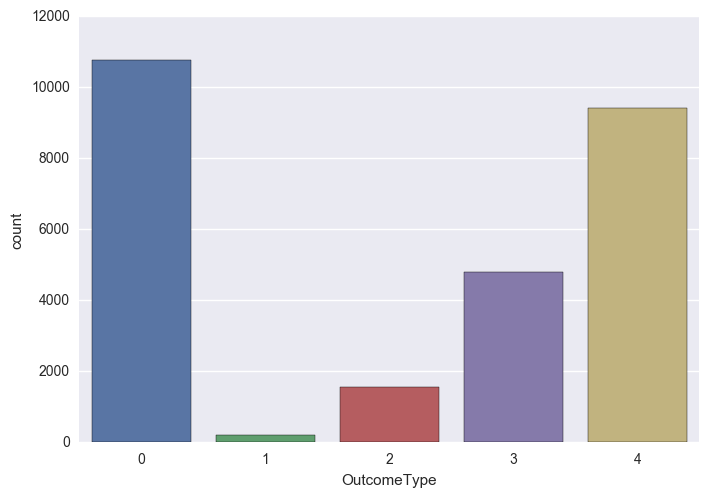

In [11]:
print lel[0].classes_
sns.countplot( train_df['OutcomeType'])
sns.plt.show()

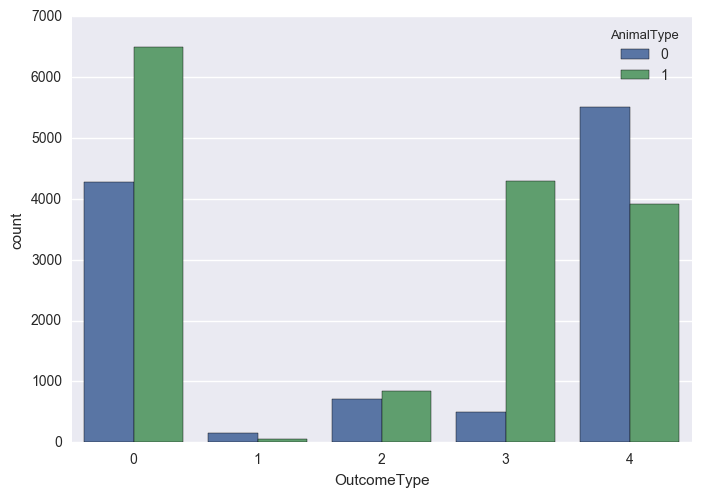

In [12]:
#sns.countplot( data = train_df, x = 'AnimalType', hue = 'OutcomeType')
sns.countplot( data = train_df, x = 'OutcomeType', hue = 'AnimalType' )
sns.plt.show()

[nan 'Intact Female' 'Intact Male' 'Neutered Male' 'Spayed Female'
 'Unknown']


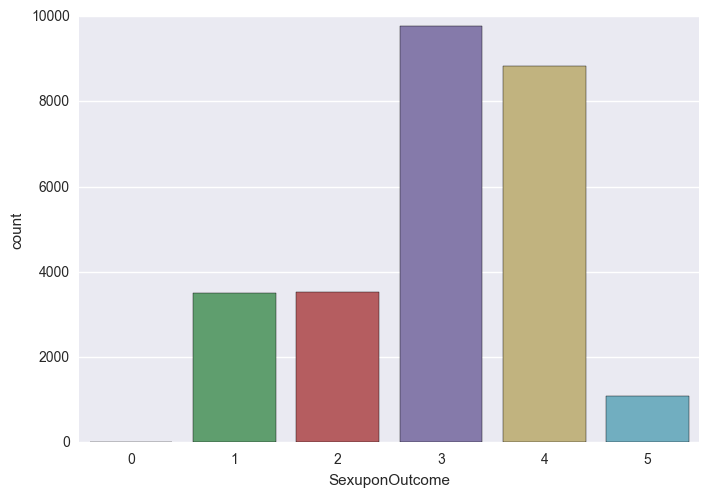

In [13]:
print lel[2].classes_
sns.countplot( train_df['SexuponOutcome'])
sns.plt.show()

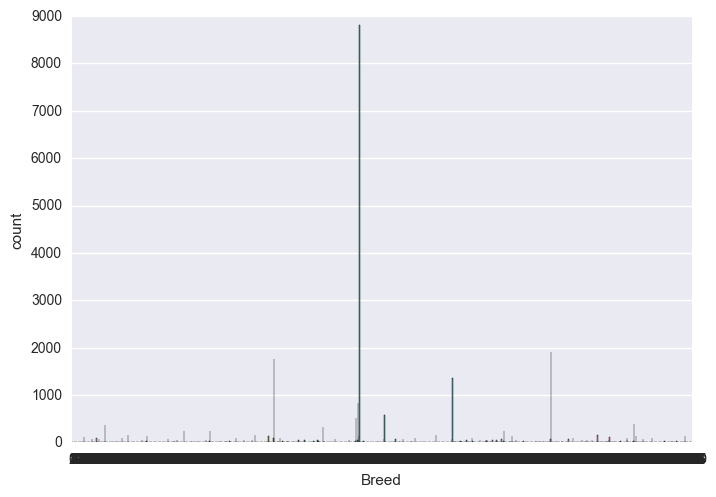

In [14]:
sns.countplot( train_df['Breed'] )
sns.plt.show()

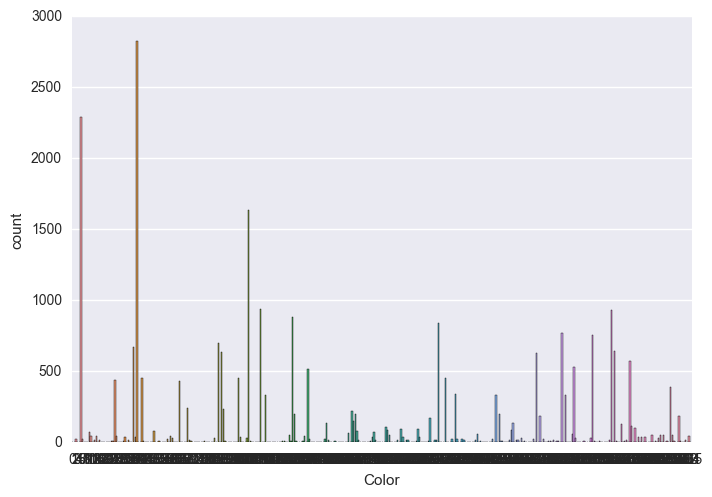

In [15]:
sns.countplot( train_df['Color'] )
sns.plt.show()

In [16]:
clc = train_df['Color'].value_counts( ascending = False )
sns.countplot( clc )

set([1, 2, 3, 4, 5])


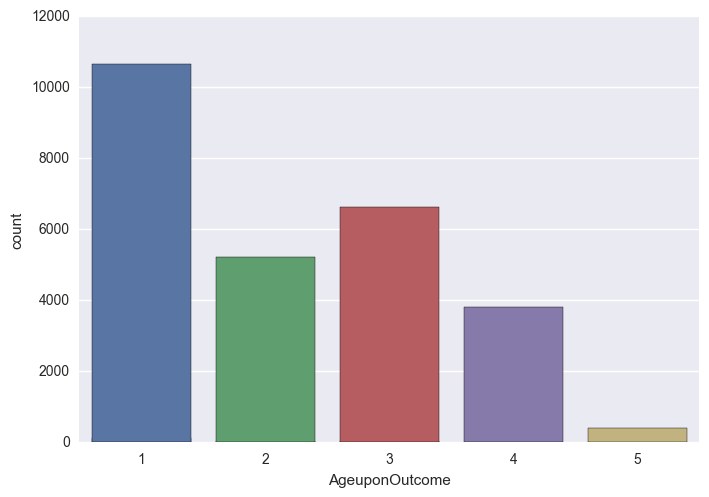

In [17]:
a = np.log( train_df['AgeuponOutcome'] ).astype(int)
for i, _ in enumerate( a ):
    if a[i] < 1: a[i] = 1
print set( a )
#sns.distplot( a )
sns.countplot( a )
sns.plt.show()

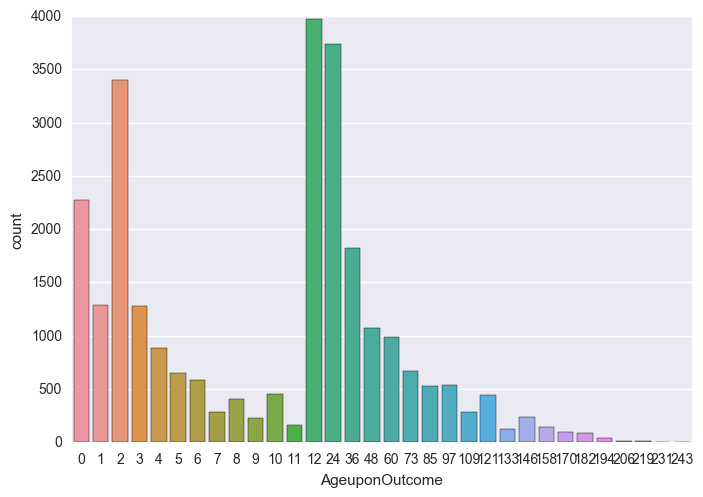

In [18]:
sns.countplot( train_df['AgeuponOutcome'] )
sns.plt.show()

In [19]:
train_df.tail(5)

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,2015-05-14 11:56:00,4,0,2,1,640,111
26725,2016-01-20 18:59:00,4,0,4,3,640,104
26726,2015-03-09 13:33:00,0,1,3,48,1022,353
26727,2014-04-27 12:22:00,4,0,2,0,640,5
26728,2015-07-02 09:00:00,4,0,2,12,640,111


In [20]:
date = train_df['DateTime']
dt = "2015-05-14 12:56:00"
print int( dt.split( '-' )[1] )

dtf = lambda x : int( x.split('-')[1] )
train_df['month'] = train_df['DateTime'].apply( dtf )
train_df.tail( 5 )

5


,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,month
26724,2015-05-14 11:56:00,4,0,2,1,640,111,5
26725,2016-01-20 18:59:00,4,0,4,3,640,104,1
26726,2015-03-09 13:33:00,0,1,3,48,1022,353,3
26727,2014-04-27 12:22:00,4,0,2,0,640,5,4
26728,2015-07-02 09:00:00,4,0,2,12,640,111,7


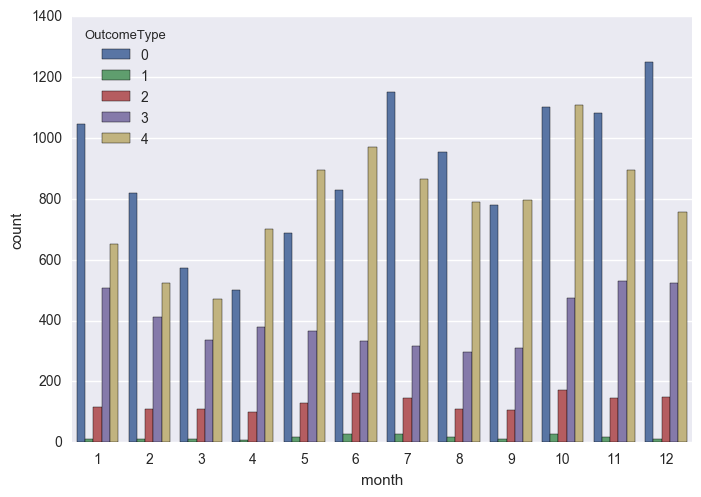

In [21]:
sns.countplot( data = train_df, x = 'month', hue = 'OutcomeType' )
sns.plt.show()

In [22]:
ddf = lambda x : 0 if int(x.split()[1].split(':')[0]) < 12 else 1
train_df['MNN'] = train_df['DateTime'].apply(ddf)
train_df.tail( 5 )

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,month,MNN
26724,2015-05-14 11:56:00,4,0,2,1,640,111,5,0
26725,2016-01-20 18:59:00,4,0,4,3,640,104,1,1
26726,2015-03-09 13:33:00,0,1,3,48,1022,353,3,1
26727,2014-04-27 12:22:00,4,0,2,0,640,5,4,1
26728,2015-07-02 09:00:00,4,0,2,12,640,111,7,0


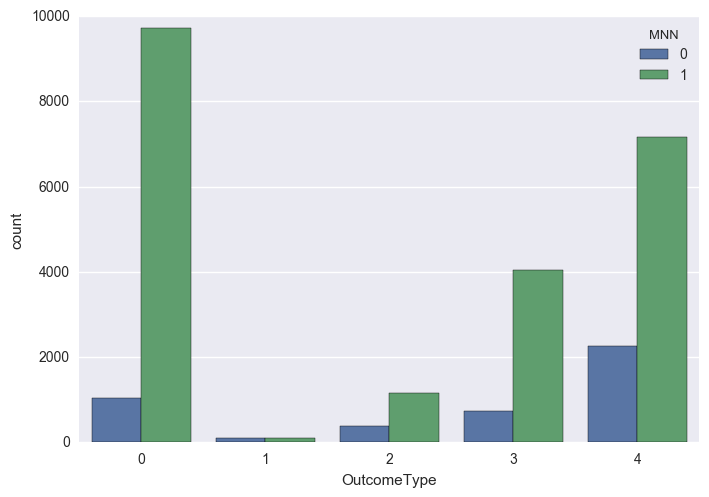

In [23]:
sns.countplot( data = train_df, x = 'OutcomeType', hue = 'MNN' )
sns.plt.show()

In [24]:
#from sklearn.svm import SVC
#outcome_type = test_df["OutcomeType"]
#test_df.drop( "OutcomeType", axis = 1, inplace = True )
#test_df.drop( "DateTime", axis = 1, inplace = True )

In [25]:
#model = SVC( kernel = 'linear' ).fit( test_df, outcome_type )

## Report

In [26]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier

In [27]:
# log loss function to check out the train result
from math import log
def evaluation_SAO( prediction_set, dfy ):
    len_pred = len( prediction_set )
    eval_ret = [ [ max( min( c, (1.0 - (10 ** -15)) ), ( 10 ** -15 ) ) for c in r ] for r in prediction_set ]
    sum_c = [ sum( [ log(xc) * yc for xc, yc in zip( xr, yr ) ] ) for xr, yr in zip( eval_ret, dfy ) ]
    sum_r = sum( sum_c ) / len_pred * -1
    return sum_r

def ytolist( dfy ):
    len_outcomes = 5
    return [ [ 1 if c is int(r) else 0 for c in range( len_outcomes )  ] for r in dfy ]

In [28]:
print new_headers
dfx = train_df[ new_headers[ 2 : 5 ] ]
dfy = train_df[ new_headers[ 1 ] ]
print dfx.tail()

['DateTime', 'OutcomeType', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']
       AnimalType  SexuponOutcome  AgeuponOutcome
26724           0               2               1
26725           0               4               3
26726           1               3              48
26727           0               2               0
26728           0               2              12


In [29]:
xtrain, xtest, ytrain, ytest = train_test_split( dfx, dfy, test_size=0.2 )

In [63]:
mdl_gaussian = GaussianNB()
mdl_gaussian.fit( xtrain, ytrain )
print classification_report( ytest, mdl_gaussian.predict( xtest ) )
print
print 'train accuracy: ', mdl_gaussian.score( xtrain, ytrain )
print 'test accuracy: ', mdl_gaussian.score( xtest, ytest )
print 'submit score train: ', evaluation_SAO( mdl_gaussian.predict_proba( xtrain ), ytolist( ytrain ) )
print 'submit score test: ', evaluation_SAO( mdl_gaussian.predict_proba( xtest ), ytolist( ytest ) )

             precision    recall  f1-score   support

          0       0.61      0.88      0.72      2112
          1       0.00      0.00      0.00        39
          2       0.21      0.09      0.13       304
          3       0.51      0.32      0.39       971
          4       0.75      0.61      0.67      1920

avg / total       0.61      0.63      0.60      5346


train accuracy:  0.627274002712
test accuracy:  0.627384960718
submit score train:  1.10932885818
submit score test:  1.11414491874


In [64]:
mdl_logistic = LogisticRegression()
mdl_logistic.fit( xtrain, ytrain )
print classification_report( ytest, mdl_logistic.predict( xtest ) )
print
print 'train accuracy: ', mdl_logistic.score( xtrain, ytrain )
print 'test accuracy: ', mdl_logistic.score( xtest, ytest )
print 'submit score train: ', evaluation_SAO( mdl_logistic.predict_proba( xtrain ), ytolist( ytrain ) )
print 'submit score test: ', evaluation_SAO( mdl_logistic.predict_proba( xtest ), ytolist( ytest ) )

             precision    recall  f1-score   support

          0       0.53      0.71      0.61      2112
          1       0.00      0.00      0.00        39
          2       0.43      0.02      0.04       304
          3       0.50      0.28      0.36       971
          4       0.57      0.58      0.57      1920

avg / total       0.53      0.54      0.51      5346


train accuracy:  0.544030304447
test accuracy:  0.541152263374
submit score train:  1.06253895369
submit score test:  1.06467955393


In [65]:
mdl_svc = SVC( probability = True )
mdl_svc.fit( xtrain, ytrain )
print classification_report( ytest, mdl_svc.predict( xtest ) )
print
print 'train accuracy: ', mdl_svc.score( xtrain, ytrain )
print 'test accuracy: ', mdl_svc.score( xtest, ytest )
print 'submit score train: ', evaluation_SAO( mdl_svc.predict_proba( xtrain ), ytolist( ytrain ) )
print 'submit score test: ', evaluation_SAO( mdl_svc.predict_proba( xtest ), ytolist( ytest ) )

             precision    recall  f1-score   support

          0       0.65      0.82      0.73      2112
          1       0.00      0.00      0.00        39
          2       0.48      0.04      0.08       304
          3       0.47      0.42      0.44       971
          4       0.71      0.66      0.69      1920

avg / total       0.63      0.64      0.62      5346


train accuracy:  0.638030210915
test accuracy:  0.641414141414
submit score train:  0.962362032137
submit score test:  0.961770965156


In [33]:
print len(dfy)
header_nlt = [ 'OutcomeType', 'Color', 'Breed', 'AnimalType', 'SexuponOutcome' ]
dfnlp = pd.read_csv( train_file, sep = ',', usecols = header_nlt )
x_clr = dfnlp[ 'Color' ]
x_brd = dfnlp[ 'Breed' ]
x_at = dfnlp['AnimalType']
x_so = dfnlp[ 'SexuponOutcome']
y_org = dfnlp[ 'OutcomeType' ]
print x_clr.head(), len( x_clr )
print x_brd.head(), len( x_brd )
print x_at.head(), len( x_at )
print x_so.head(), len( x_so )
print y_org.head(), len( y_org )


26729
0    Brown/White
1    Cream Tabby
2     Blue/White
3     Blue Cream
4            Tan
Name: Color, dtype: object 26729
0          Shetland Sheepdog Mix
1         Domestic Shorthair Mix
2                   Pit Bull Mix
3         Domestic Shorthair Mix
4    Lhasa Apso/Miniature Poodle
Name: Breed, dtype: object 26729
0    Dog
1    Cat
2    Dog
3    Cat
4    Dog
Name: AnimalType, dtype: object 26729
0    Neutered Male
1    Spayed Female
2    Neutered Male
3      Intact Male
4    Neutered Male
Name: SexuponOutcome, dtype: object 26729
0    Return_to_owner
1         Euthanasia
2           Adoption
3           Transfer
4           Transfer
Name: OutcomeType, dtype: object 26729


In [34]:
rep = lambda x : x.replace( '/', ' ' ).strip().split()
x_clr = x_clr.apply( rep )
x_brd = x_brd.apply( rep )
x_so = x_so.apply( lambda x : x.split() if type(x) is str else ['none'] )

print x_clr.head(), len( x_clr )
print x_brd.head(), len( x_brd )
print x_so.head(), len( x_so )

0    [Brown, White]
1    [Cream, Tabby]
2     [Blue, White]
3     [Blue, Cream]
4             [Tan]
Name: Color, dtype: object 26729
0           [Shetland, Sheepdog, Mix]
1          [Domestic, Shorthair, Mix]
2                    [Pit, Bull, Mix]
3          [Domestic, Shorthair, Mix]
4    [Lhasa, Apso, Miniature, Poodle]
Name: Breed, dtype: object 26729
0    [Neutered, Male]
1    [Spayed, Female]
2    [Neutered, Male]
3      [Intact, Male]
4    [Neutered, Male]
Name: SexuponOutcome, dtype: object 26729


In [35]:
def word_feats(words):
    return dict([(word, True) for word in words] )


labeled_clr = [ (word_feats( c ), str( y )) for c, y in zip( x_clr, y_org ) ]
labeled_clr[:5]

[({'Brown': True, 'White': True}, 'Return_to_owner'),
 ({'Cream': True, 'Tabby': True}, 'Euthanasia'),
 ({'Blue': True, 'White': True}, 'Adoption'),
 ({'Blue': True, 'Cream': True}, 'Transfer'),
 ({'Tan': True}, 'Transfer')]

In [36]:
labeled_brd = [ (word_feats( c ), str( y )) for c, y in zip( x_brd, y_org ) ]
labeled_brd[:5]

[({'Mix': True, 'Sheepdog': True, 'Shetland': True}, 'Return_to_owner'),
 ({'Domestic': True, 'Mix': True, 'Shorthair': True}, 'Euthanasia'),
 ({'Bull': True, 'Mix': True, 'Pit': True}, 'Adoption'),
 ({'Domestic': True, 'Mix': True, 'Shorthair': True}, 'Transfer'),
 ({'Apso': True, 'Lhasa': True, 'Miniature': True, 'Poodle': True},
  'Transfer')]

In [37]:
labeled_so = [ (word_feats( c ), str( y )) for c, y in zip( x_so, y_org ) ]

In [38]:
lbl_blended = \
[ (word_feats( c + b + s + [a] ), str( y )) for c, b, s, a, y in zip( x_clr, x_brd, x_so, x_at, y_org ) ]

In [39]:
labeled_hyb = labeled_clr + labeled_brd
labeled_hyb[:5]

[({'Brown': True, 'White': True}, 'Return_to_owner'),
 ({'Cream': True, 'Tabby': True}, 'Euthanasia'),
 ({'Blue': True, 'White': True}, 'Adoption'),
 ({'Blue': True, 'Cream': True}, 'Transfer'),
 ({'Tan': True}, 'Transfer')]

In [40]:
import nltk
from nltk.classify import NaiveBayesClassifier

clr_classifier = nltk.NaiveBayesClassifier.train( labeled_clr )
print( nltk.classify.accuracy( clr_classifier, labeled_clr ) )
print clr_classifier.show_most_informative_features()

brd_classifier = nltk.NaiveBayesClassifier.train( labeled_brd )
print( nltk.classify.accuracy( brd_classifier, labeled_brd ) )
print brd_classifier.show_most_informative_features()

hyb_classifier = nltk.NaiveBayesClassifier.train( labeled_hyb )
print( nltk.classify.accuracy( hyb_classifier, labeled_hyb ) )
print hyb_classifier.show_most_informative_features()

bld_classifier = nltk.NaiveBayesClassifier.train( lbl_blended )
print( nltk.classify.accuracy( bld_classifier, lbl_blended ) )
print bld_classifier.show_most_informative_features()

0.429047102398
Most Informative Features
                   Smoke = True             Died : Return =     24.2 : 1.0
                    Pink = True             Died : Transf =     20.4 : 1.0
                   Flame = True             Died : Return =     18.8 : 1.0
                    Seal = True             Died : Return =      8.9 : 1.0
                   Tabby = True             Died : Return =      8.5 : 1.0
                   Lilac = True           Transf : Return =      7.3 : 1.0
                  Calico = True           Transf : Return =      6.6 : 1.0
                   Point = True             Died : Return =      6.0 : 1.0
                  Orange = True             Died : Return =      5.6 : 1.0
                   Sable = True           Adopti : Euthan =      5.4 : 1.0
None
0.453701971641
Most Informative Features
                Brittany = True             Died : Transf =     28.6 : 1.0
                   Akita = True             Died : Transf =     20.4 : 1.0
             

In [41]:
test = word_feats(['tan', 'Orange'])
print clr_classifier.classify( test )
pds = clr_classifier.prob_classify( test )
labels = list( pds.samples() )
lbl_prob =  [ pds.prob( lbl ) for lbl in  labels ]
print lbl_prob
print sum( lbl_prob )

Transfer
[0.4800642965934793, 0.39189890667084987, 0.052412135570882576, 0.012119096027920084, 0.0635055651368682]
1.0


In [42]:
svc_ret = mdl_svc.predict_proba( xtrain )
print svc_ret

[[ 0.47753622  0.00550388  0.03774892  0.32530725  0.15390373]
 [ 0.64964483  0.00568472  0.03254457  0.09690159  0.21522429]
 [ 0.6334541   0.0043771   0.03394306  0.17782681  0.15039893]
 ..., 
 [ 0.6366358   0.00535076  0.0322666   0.11717366  0.20857318]
 [ 0.11525523  0.01319382  0.06574467  0.04111348  0.76469281]
 [ 0.64889936  0.00484792  0.03384807  0.09688987  0.21551478]]


## Test set

In [43]:
test_header = [ 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color' ]
test_file = 'test.csv'
test_df = pd.read_csv( test_file, sep = ',', usecols = test_header )
test_df.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [44]:
# label encoding
# age to days
# text split

In [45]:
from sklearn.preprocessing import LabelEncoder
    
# argumenst : pandas data frame, pandas data frame headers to be encoded
def label_encoder( pdf, lbl_encode_headers ):
    lel = [ LabelEncoder() for i in range( len( lbl_encode_headers ) ) ]
    encoded_lbl = [ l.fit( pdf[ lbl_encode_headers[i] ] ) for i, l in enumerate(lel) ]
    for i, l in enumerate( encoded_lbl ):
        pdf[lbl_encode_headers[i]] = l.transform( pdf[lbl_encode_headers[i]] )

In [46]:
label_encoder( test_df, [ ['AnimalType'], ['SexuponOutcome'] ] )
test_df[ 'AgeuponOutcome' ] = test_df[ 'AgeuponOutcome' ].apply( atod )
test_df[ 'AgeuponOutcome' ] = test_df[ 'AgeuponOutcome' ].apply( dtom )
test_df['Breed'] = test_df['Breed'].apply( rep )
test_df['Color'] = test_df['Color'].apply( rep )
print len( test_df )
test_df.head()

11456


C:\Users\SJPark\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SJPark\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,0,10,"[Labrador, Retriever, Mix]","[Red, White]"
1,1,3,24,"[German, Shepherd, Siberian, Husky]","[Black, Tan]"
2,0,2,12,"[Domestic, Shorthair, Mix]","[Brown, Tabby]"
3,1,1,4,"[Collie, Smooth, Mix]",[Tricolor]
4,1,2,24,"[Miniature, Poodle, Mix]",[White]


In [47]:
xtest_n = test_df[ ['AnimalType', 'SexuponOutcome', 'AgeuponOutcome'] ]
xtest_b = test_df[ 'Breed' ]
xtest_c = test_df[ 'Color' ]

In [48]:
def nb_classifier_prob( classifier, dfx ):
    dfx_processed = dfx.apply( word_feats )
    labels = list( classifier.labels() )
    probs = []
    for i in dfx_processed:
        probs.append( [classifier.prob_classify( i ).prob( lbl ) for lbl in labels] )    
    
    return probs

In [49]:
svc_ret_test = mdl_svc.predict_proba( xtest_n )
nb_ret_test_c = nb_classifier_prob( clr_classifier, xtest_c )
nb_ret_test_b = nb_classifier_prob( brd_classifier, xtest_b )

In [50]:
print lel[0].classes_
print clr_classifier.labels()
print brd_classifier.labels()

print svc_ret_test[0]
print nb_ret_test_c[0]
print nb_ret_test_b[0]

print svc_ret_test.shape
print len( nb_ret_test_c )
print len( nb_ret_test_b )

['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']
['Transfer', 'Adoption', 'Return_to_owner', 'Died', 'Euthanasia']
['Transfer', 'Adoption', 'Return_to_owner', 'Died', 'Euthanasia']
[ 0.29810606  0.00705063  0.06187578  0.14445763  0.4885099 ]
[0.2337698378015684, 0.39661945403472093, 0.31196348091409165, 0.0034433060051386345, 0.0542039212444793]
[0.1665503210377476, 0.4737010763570396, 0.3227290262103086, 0.0013890623789185369, 0.03563051401598554]
(11456L, 5L)
11456
11456


In [51]:
print clr_classifier.prob_classify( word_feats( xtest_c[1131] ) ).samples()
print brd_classifier.prob_classify( word_feats( xtest_b[0] ) ).samples()

['Transfer', 'Adoption', 'Return_to_owner', 'Died', 'Euthanasia']
['Transfer', 'Adoption', 'Return_to_owner', 'Died', 'Euthanasia']


In [52]:
# label sequence of nltk.classifier is different from encoded label sequence
# need to write swqp code

import copy
# inplace swap
def swap( target, t1, t2 ):
    target[t1], target[t2] = target[t2], target[t1]

swap_seq = ((1,0), (3,1), (4,2), (4,3))

def seq_swap( target, seq = swap_seq):
    for s in seq:
        swap( target, s[0], s[1] )

cls_lbls = copy.deepcopy( clr_classifier.labels() )
print cls_lbls
swap( cls_lbls, 1, 0 )
print cls_lbls
swap( cls_lbls, 3, 1 )
print cls_lbls
swap( cls_lbls, 4, 2 )
print cls_lbls
swap( cls_lbls, 4, 3 )
print cls_lbls

['Transfer', 'Adoption', 'Return_to_owner', 'Died', 'Euthanasia']
['Adoption', 'Transfer', 'Return_to_owner', 'Died', 'Euthanasia']
['Adoption', 'Died', 'Return_to_owner', 'Transfer', 'Euthanasia']
['Adoption', 'Died', 'Euthanasia', 'Transfer', 'Return_to_owner']
['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']


In [53]:
mlbl = copy.deepcopy( clr_classifier.labels() )
seq_swap( mlbl, seq = swap_seq)
print mlbl

['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']


In [54]:
sorted_rslt_c = copy.deepcopy( nb_ret_test_c )
print sorted_rslt_c[0]
for t in sorted_rslt_c:
    seq_swap( t )
print sorted_rslt_c[0]
print
sorted_rslt_b = copy.deepcopy( nb_ret_test_b )
print sorted_rslt_b[0]
for t in sorted_rslt_b:
    seq_swap( t )
print sorted_rslt_b[0]
print ['Transfer', 'Adoption', 'Return_to_owner', 'Died', 'Euthanasia']

[0.2337698378015684, 0.39661945403472093, 0.31196348091409165, 0.0034433060051386345, 0.0542039212444793]
[0.39661945403472093, 0.0034433060051386345, 0.0542039212444793, 0.31196348091409165, 0.2337698378015684]

[0.1665503210377476, 0.4737010763570396, 0.3227290262103086, 0.0013890623789185369, 0.03563051401598554]
[0.4737010763570396, 0.0013890623789185369, 0.03563051401598554, 0.3227290262103086, 0.1665503210377476]
['Transfer', 'Adoption', 'Return_to_owner', 'Died', 'Euthanasia']


In [55]:
def combine_probs( rslts, ratio_list ):
    return [[sum([rslts[k][i][j] * ratio_list[k] for k in range(len(rslts))]) \
      for j in range(len(rslts[0][i]))] for i in range(len(rslts[0]))]

#ret = combine_probs( [svc_ret_test, nb_ret_test_c, nb_ret_test_b ] )
ret = combine_probs( [ svc_ret_test, sorted_rslt_c, sorted_rslt_b ], [ 0.4, 0.3, 0.3 ] )
print svc_ret_test.shape
print len( ret )
print ret[ : 2 ]

(11456L, 5L)
11456
[[0.38033858251377972, 0.0042699615006911362, 0.051700644245896252, 0.24819080500870172, 0.31550000673093082], [0.42871108748856157, 0.0032465812597897254, 0.033489431421702839, 0.3989291310567602, 0.13562376877318499]]


In [56]:
# test output file write function
def write_test_out( filename, headers, data, base_idx = 0, sep = ',', lsep = '\n' ):
    with open( filename, 'wb' ) as tfo:
        tfo.write( sep.join( headers ) + lsep )
        for i, d in enumerate( data ):
            row = [ str( i + base_idx ) ] + [ str( l ) for l in d ]
            tfo.write( sep.join( row ) + lsep )

In [57]:
test_result_file_name = 'testout.csv'
test_result_file_header = ['ID', 'Adoption', 'Died', 'Euthanasia' ,'Return_to_owner', 'Transfer']
            
write_test_out( test_result_file_name, test_result_file_header, ret, base_idx = 1 )    

### Selecting most highest probability

In [58]:
#import operator
#index, value = max( enumerate( my_list ), key = operator.itemgetter( 1 ) )

def peaker( data ):
    tc = copy.deepcopy( data )
    for ri, r in enumerate( tc ):
        max_idx = r.index( max(r) )
        for ci, _ in enumerate( r ):
            tc[ri][ci] = 1 if ci is max_idx else 0
            
    return tc

In [59]:
peaked_ret = peaker( ret )
write_test_out( 'peaked_testout.csv', test_result_file_header, peaked_ret, base_idx = 1 )  

### Rated voting 

In [60]:
pkd_svc_ret_test = peaker( svc_ret_test.tolist() )
pkd_srtd_rslt_c = peaker( sorted_rslt_c )
pkd_srtd_rslt_b = peaker( sorted_rslt_b )

pkd_vote_ret = combine_probs( [ pkd_svc_ret_test, pkd_srtd_rslt_c, pkd_srtd_rslt_b ], [ 0.4, 0.3, 0.3 ] )
print pkd_vote_ret[:10]

[[0.6, 0.0, 0.0, 0.0, 0.4], [0.7, 0.0, 0.0, 0.3, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0], [0.6, 0.0, 0.0, 0.0, 0.4], [0.6, 0.0, 0.0, 0.0, 0.4], [0.6, 0.0, 0.0, 0.0, 0.4], [0.0, 0.0, 0.0, 0.0, 1.0], [0.4, 0.0, 0.0, 0.0, 0.6], [1.0, 0.0, 0.0, 0.0, 0.0], [0.7, 0.0, 0.0, 0.3, 0.0]]


In [61]:
write_test_out( 'pkd_vt_testout.csv', test_result_file_header, pkd_vote_ret, base_idx = 1 )

### next steps
- most informative words selection
- classification and voting method
- start from data exploration
- need to figure out a way to compare outcome and trained data

In [62]:
print evaluation_SAO( svc_ret, ytolist( dfy ) )

1.56260746612
